# **Customer-Segmentation Non-Hierarchial Clustering**

## Use K Means algorithm to form clusters at optimal value of K .

In [286]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# will import rest of the libraries when required

In [287]:
# Read Data
df= pd.read_csv('Data01.csv' , index_col= [0])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


**Obtain the summary statistic of data.**

In [289]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [290]:
# Age varies from 18 to 70 and 75% of people are less than 50 years of age . 
# Annual income ranges between 15 to 137 , though 3/4 has income below $ 78 .

In [291]:
df.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [292]:
# female count is more than men in available data .

**Find and impute the missing Values in the data .**

In [293]:
df.isnull().sum()  # there is no missing values in the dataset.

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Visualize the outliers in the dataset using boxplot and remove them if necessary**

In [294]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1

In [295]:
df=df[~((df<(q1-1.5*IQR)) |(df>(q3+1.5*IQR))).any(axis=1)]

In [296]:
df.shape

(198, 4)

<AxesSubplot:>

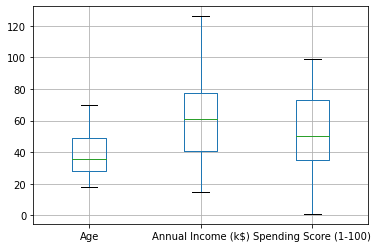

In [297]:
df.boxplot()

**Drop and transform variables as a part of data preparation .**

In [298]:
X=df.drop(['Gender','Age'],axis=1)

In [299]:
Cpy=X.copy()

In [300]:
from sklearn.preprocessing import MinMaxScaler

In [301]:
mm=MinMaxScaler()

In [302]:
Scaled_df = pd.DataFrame(mm.fit_transform(X) , columns = X.columns)  # fit calc: mean and std , transform: scaled the data using z scale

In [303]:
Scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.009009,0.051020
3,0.009009,0.775510
4,0.018018,0.397959


**Select the range of clusters k which you think can give the optimal number for k .**

* guess cluster range using pair plot or appropriate visualization

* understand the data and consider optimal range of clusters using the domain knowledge

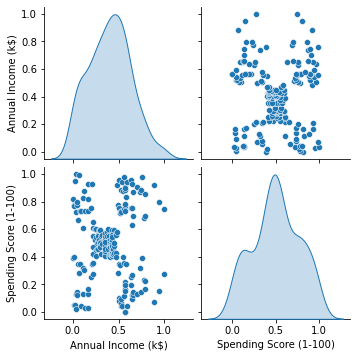

In [304]:
sns.pairplot(Scaled_df ,diag_kind='kde', palette='bright')

In [305]:
# according to pair plot 2 peaks are visible and possible range can be from 2 to 6

In [306]:
# according to domain knowledge it would be preferable to target people 
# in either two bands below average income , above average income or
# in three bands less income/spending score , average income/spending score , high income/spending score 

**Obtain the clusters value at optimal value of K .**

* Inertia 
* Elbow method
* Silhouette coefficient
* Visualization

In [307]:
from sklearn.cluster import KMeans

In [308]:
clusters_range = range(1 , 7)
wsse=[]
for n_clusters in clusters_range:
    kmeans=KMeans(n_clusters , n_init= 5 , random_state =10)  
    # n_init: Chooses the row from matrix(5Xk) which gives the maximum difference between centroids
    kmeans.fit(Scaled_df)
    wsse.append(kmeans.inertia_)

In [309]:
inertia=pd.DataFrame({'K': clusters_range , 'Inertia':wsse})
inertia.head(10)

,K,Inertia
0,1,23.781274
1,2,14.925732
2,3,9.471505
3,4,6.280510
4,5,3.565078
5,6,3.097665


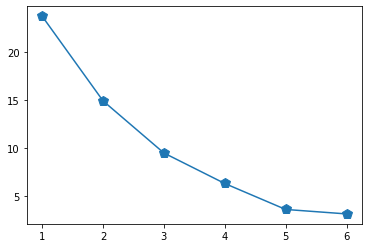

In [310]:
plt.plot(inertia.K, inertia.Inertia , marker='p',markersize=10)

In [311]:
# since the decline is max at 2 and 4 , the cluster value can be taken as either 2 or 4 .
# since the inertia is high at 2 and 4 cluster will be to many for division 
# so we can take as per the domain requirement . 

In [312]:
# to cross verify the optimal value of k we can use Silhouette Index (Cluster Validity Index)

In [313]:
from sklearn.metrics import silhouette_score

In [314]:
clusters_range = range(2 , 7)
score=[]
for n_clusters in clusters_range:
    Kmeans=KMeans(n_clusters , n_init= 5 , random_state =10)  
    # n_init: Chooses the row from matrix(5Xk) which gives the maximum difference between centroids
    Kmeans.fit(Scaled_df)
    silhouette_avg = silhouette_score(Scaled_df, Kmeans.labels_ , random_state =10)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.31916358511714177
For n_clusters = 3 The average silhouette_score is : 0.45462698579924626
For n_clusters = 4 The average silhouette_score is : 0.4999162571098343
For n_clusters = 5 The average silhouette_score is : 0.5640959164678206
For n_clusters = 6 The average silhouette_score is : 0.46124573925575213


In [315]:
# According to Silhouette Index the optimal value of k can be 3 and 4 (both are approx 0.5) .
# so lets check the clustering quality at k = 3 

**Fit K means clustering algorithm with an optimal number of clusters. .**
* predictions
* kmeans.labels_

In [316]:
kmodel=KMeans(n_clusters=3 , n_init=5 , random_state=10)
kmodel.fit(Scaled_df)
clusters=kmodel.predict(Scaled_df)

In [317]:
np.unique(clusters)

array([0, 1, 2])

**Obtain the centroids of the clusters formed using K-means clustering at optimal k value .**
* kmeans.cluster_centers_

In [318]:
centroids = kmodel.cluster_centers_
print("Centroid values")
print(centroids)

Centroid values
[[0.26310737 0.49473068]
 [0.62162162 0.83019362]
 [0.63647431 0.18008825]]


**Intrepret the size of clusters and value counts of each group .**
* assign clusters to each index in dataframe
* value_counts()
* Visualize clusters

In [319]:
df['Clusters']=clusters
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,0
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


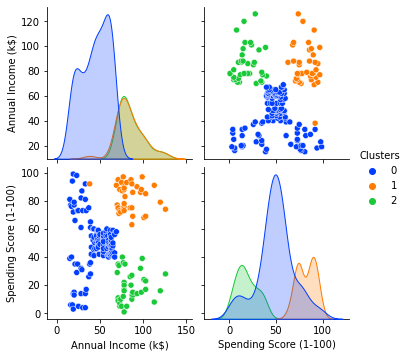

In [320]:
sns.pairplot(df.drop('Age' , axis=1),diag_kind='kde',hue='Clusters',palette='bright');

In [321]:
# this looks like 3 is an optimal number of cluster .

In [322]:
df['Clusters'].value_counts()

0    122
1     39
2     37
Name: Clusters, dtype: int64

In [323]:
# cluster 0 has the maximum number of customers

**Summarize and visualize each cluster individually.**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

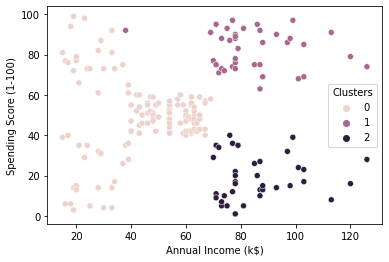

In [324]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'] , hue=df['Clusters'])

#scatter plot shows clear division between clusters and that the cluster one has the maxmimum variation.

In [325]:
# Cluster 1 : more income more expenditure(Target) 
# Cluster 2 : more income less expenditure (Potential) , 
# Cluster 0 : less than average income with varied expenditure (Others)

In [326]:
Target=df[df['Clusters'] == 1]

In [327]:
Potential = df[df['Clusters'] == 2]

In [328]:
Others = df[df['Clusters']  == 0]

In [329]:
Target.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,39.000000,39.000000,39.000000,39.0
mean,32.538462,84.000000,82.358974,1.0
std,3.959307,15.952231,9.496501,0.0
min,24.000000,38.000000,63.000000,1.0
25%,30.000000,74.500000,74.500000,1.0
50%,32.000000,78.000000,85.000000,1.0
75%,35.500000,90.500000,90.500000,1.0
max,40.000000,126.000000,97.000000,1.0


In [330]:
# min annual income average is 84 and expenditure score range from 63 to 97.
# this group belongs to young people since 75% are below 35 years of age . 
# this group provide us with the ""Valuable customers.""

In [331]:
Potential.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,37.000000,37.000000,37.000000,37.0
mean,40.621622,85.648649,18.648649,2.0
std,11.446376,14.170031,11.066005,0.0
min,19.000000,70.000000,1.000000,2.0
25%,34.000000,76.000000,10.000000,2.0
50%,42.000000,79.000000,16.000000,2.0
75%,47.000000,93.000000,27.000000,2.0
max,59.000000,126.000000,40.000000,2.0


In [332]:
# Average Annual Income of this group is slightly higher than the target customers having very low expenditure score
# this group has people mostly between 20 to 50 years of age . 
# means they can be our ""potential customers""

In [333]:
Others.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,122.000000,122.000000,122.000000,122.0
mean,40.459016,44.204918,49.483607,0.0
std,16.111260,16.094216,19.397211,0.0
min,18.000000,15.000000,3.000000,0.0
25%,25.250000,30.000000,42.000000,0.0
50%,39.000000,46.500000,50.000000,0.0
75%,51.750000,59.750000,58.000000,0.0
max,70.000000,69.000000,99.000000,0.0


In [334]:
# this group has huge variation so it can further classify into ""sub groups""
# GROUP 1 : people with low income and high expenditure (they can also be our target customers )
# GROUP 2 : people with low income and low expenditure (these customers are not very significant from bussiness point of view)